# Data Visualization with Python Matplotlib for Beginner - Part 1

<p><b>About :</b> Membekali kamu untuk mengerti pemanfaatan library matplotlib dalam melakukan visualisasi data menggunakan pemrograman python. Pada Part 1, kamu diharapkan dapat memahami bagaimana membuat sebuah plot dengan matplotlib, dan mampu memodifikasi berbagai komponen di dalam plot tersebut.</p>

<p><b>Course :</b> <a href=https://academy.dqlab.id/main/package/practice/164?pf=0>Data Visualization with Python Matplotlib for Beginner - Part 1</a></p>

<h2>Module Content:</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#pengenalan-matplotlib">Pengenalan Matplotlib dan Persiapan Dataset</a></li>
        <li><a href="#plot-pertama">Plot Pertama dengan Matplotlib</a></li>
        <li><a href="#kustomisasi-grafik">Kustomisasi Grafik</a></li>
        <li><a href="#mini-quiz">Mini Quiz</a></li>
    </ul>
</div>

<h2><a name="pengenalan-matplotlib"></a>Chapter 1: Pengenalan Matplotlib dan Persiapan Dataset</h2>

<p>Dalam menganalisa data, sering kali menggunakan visualisasi data untuk memahami karakteristik maupun trend di dalam data yang dimiliki.</p>

<p>Salah satu library di python yang biasa digunakan untuk keperluan visualisasi data adalah matplotlib.</p>

 

<p>Dalam modul ini, akan dijelaskan beberapa hal yang dapat dilakukan dengan matplotlib. Di antaranya:</p>

<li>Pengolahan dataset (menggunakan library NumPy & Pandas).</li>
<li>Membuat grafik dasar menggunakan matplotlib.</li>
<li>Melakukan modifikasi komponen visualisasi, seperti axis, labels, title, dan legend.</li>
<li>Menyimpan plot visualisasi yang sudah dibuat</li>

<h4>Persiapan Dataset</h4>

In [1]:
import pandas as pd

dataset = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv')
print('Ukuran dataset: %d baris dan %d kolom\n' % dataset.shape)
print('Lima data teratas:')
dataset.head()

Ukuran dataset: 5000 baris dan 9 kolom

Lima data teratas:


,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000


<p>Deskripsi feature pada dataset diatas</p>
<li><b>order_id</b> : ID dari order/transaksi, 1 transaksi bisa terdiri dari beberapa produk, tetapi hanya dilakukan oleh 1 customer</li>
<li><b>order_date</b> : tanggal terjadinya transaksi</li>
<li><b>customer_id</b> : ID dari pembeli, bisa jadi dalam satu hari, 1 customer melakukan transaksi beberapa kali</li>
<li><b>city</b> : kota tempat toko terjadinya transaksi</li>
<li><b>province</b> : provinsi (berdasarkan city)</li>
<li><b>product_id</b> : ID dari suatu product yang dibeli</li>
<li><b>brand</b> : brand/merk dari product. Suatu product yang sama pasti memiliki brand yang sama</li>
<li><b>quantity</b> : Kuantitas / banyaknya product yang dibeli</li>
<li><b>item_price</b> : Harga dari 1 product (dalam Rupiah). Suatu product yang sama, bisa jadi memiliki harga yang berbeda saat dibeli</li>

<h4>Menampilkan Gross Merchandise Value atau total uang yang dibayarkan customer.</h4>

In [2]:
import datetime

# tambahkan kolom 'order_month'
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
dataset.head()

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price,order_month
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000,2019-10
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000,2019-10
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000,2019-11
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000,2019-08
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000,2019-10


Definisikan GMV adalah perkalian setiap entri di kolom item_price dan kolom quantity. Bisa saja menggunakan fungsi apply & lambda seperti tadi, tetapi ada cara yang lebih mudah yaitu dengan mengalikan kedua kolom yang disebutkan secara langsung.

In [3]:
# tambahkan kolom 'gmv'
dataset['gmv'] = dataset['item_price']*dataset['quantity']
print('Ukuran dataset: %d baris dan %d kolom\n' % dataset.shape)
print('Lima data teratas:')
dataset.head()

Ukuran dataset: 5000 baris dan 11 kolom

Lima data teratas:


,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price,order_month,gmv
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000,2019-10,7400000
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000,2019-10,1208000
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000,2019-11,8360000
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000,2019-08,820000
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000,2019-10,8950000


<h2><a name="plot-pertama"></a>Chapter 2: Plot Pertama dengan Matplotlib</h2>

<h4>Membuat Data Agregat</h4>

In [4]:
monthly_amount = dataset.groupby('order_month')['gmv'].sum().reset_index()
monthly_amount

,order_month,gmv
0,2019-07,3524041000
1,2019-08,4452923000
2,2019-09,3947002000
3,2019-10,6719937000
4,2019-11,6182229000
5,2019-12,8148235000


<h4>Line Chart Trend Pertumbuhan GMV</h4>

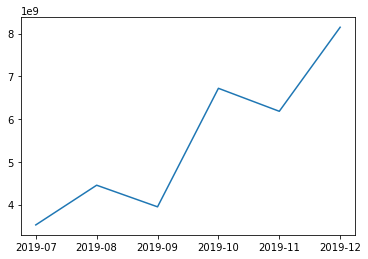

In [5]:
import matplotlib.pyplot as plt

plt.plot(monthly_amount['order_month'], monthly_amount['gmv'])
plt.show()

<h4>Cara Alternatif: Fungsi <code>.plot()</code> pada pandas Dataframe</h4>

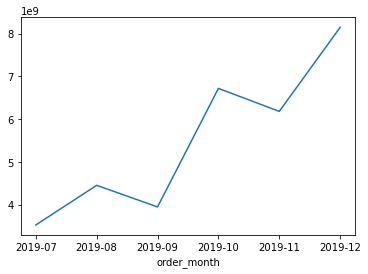

In [6]:
dataset.groupby(['order_month'])['gmv'].sum().plot()
plt.show()

<h2><a name="kustomisasi-grafik"></a>Chapter 3: Kustomisasi Grafik</h2>

<h4>Anatomi dari Figure</h4>

<p>Ada beberapa istilah dan komponen di sebuah plot, nanti akan mempermudah mengingat function apa yang digunakan untuk memodifikasinya.</p>

<li>Figure adalah keseluruhan visualisasi yang kita plot dalam 1 kali menjalankan code.</li>
<li>Sedangkan satu plot (yang dibuat saat memanggil .plot() atau .scatter()) disebut Axes. Sebuah Figure bisa terdiri dari beberapa Axes. </li>
<li>Setiap Axes biasanya memiliki sumbu-X (X-axis) dan sumbu-Y (Y-axis). Masing-masing sumbu memiliki komponen sebagai berikut:</li>
<ul>
    <li>Axis Label: Nama dari sumbu yang ditampilkan.</li>
    <li>Tick: Penanda berupa titik/garis kecil yang berjajar di sumbu, sebagai referensi skala nilai.</li>
    <li>Tick Label: Tulisan di tiap tick yang menyatakan nilainya.</ul></li>
<li>Untuk isi grafiknya sendiri, bisa berupa line (untuk line plot), atau marker (untuk scatter plot), bisa juga bentuk lain seperti bar (untuk bar plot / histogram).</li>
<li>Aksesoris lain yang bisa ditambahkan, di antaranya Grid untuk mempermudah melihat tick yang sejajar, dan Text untuk memberikan informasi tambahan berbentuk teks di grafik.</li>
 
<p>Memahami komponen-komponen di atas sudah cukup untuk melakukan berbagai visualisasi dengan matplotlib. Untuk anatomi yang lebih lengkap, bisa dilihat di link berikut: <a href="https://matplotlib.org/3.1.3/gallery/showcase/anatomy.html">https://matplotlib.org/3.1.3/gallery/showcase/anatomy.html.</a></p>

<h4>Mengubah Figure Size</h4>

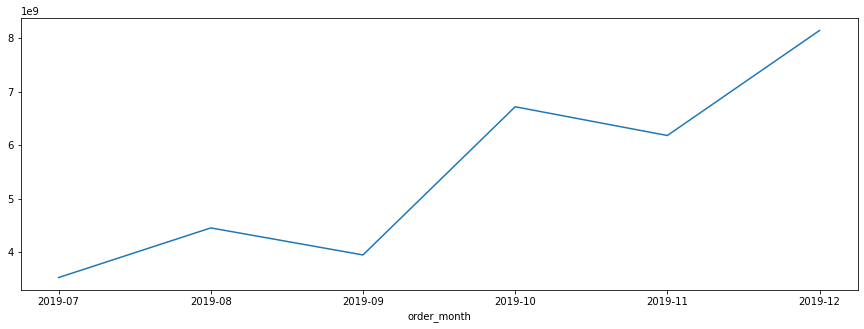

In [7]:
plt.figure(figsize=(15,5)) # custom figure size
dataset.groupby(['order_month'])['gmv'].sum().plot()
plt.show()

Dalam contoh ini, ukuran Figure telah diubah agar memiliki panjang 15 inch, dan lebar 5 inch. Sehingga line chart-nya bisa memanjang ke kanan dan lebih mudah dilihat trend-nya.

<h4>Menambahkan Title and Axis Labels</h4>

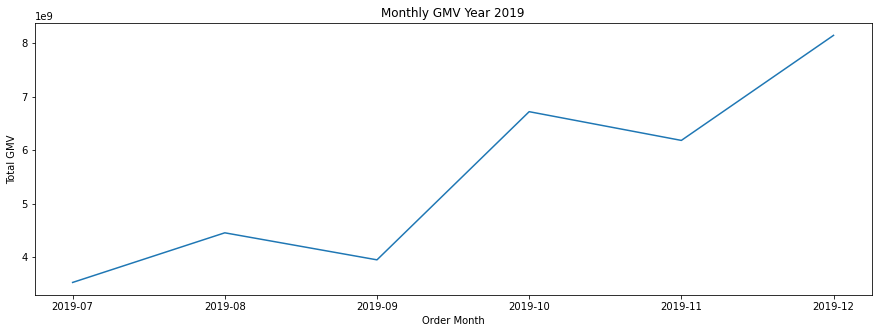

In [8]:
plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot()
# menambahkan title dan axis label
plt.title('Monthly GMV Year 2019')
plt.xlabel('Order Month')
plt.ylabel('Total GMV')
plt.show()

<h4>Kustomisasi Title and Axis Labels</h4>

<p>Parameter yang bisa ditambahkan:</p>

<li><b>loc</b>: digunakan untuk menentukan posisi title, misalnya ‘left’ untuk membuat rata kiri, ‘right’ untuk rata kanan, dan ‘center’ untuk meletakkannya di tengah. Jika tidak didefinisikan, maka defaultnya title ada di tengah.</li>
<li><b>pad</b>: digunakan untuk menambahkan jarak antara judul ke grafik (dalam satuan px), misalnya kita tidak ingin judulnya terlalu menempel dengan grafiknya, jadi kita beri jarak.</li>
<li><b>fontsize</b>: digunakan untuk mengganti ukuran font/huruf (dalam satuan px).</li>
    <li><b>color</b>: digunakan untuk mengganti warna huruf judul. Kita bisa menggunakan warna dasar dengan kata seperti ‘blue’, ‘red’, </li>‘orange’, dsb. Bisa juga dengan hex string, misalnya '#42DDF5' untuk warna biru muda.</li>

<p>Untuk xlabel dan ylabel, kita bisa mengganti fontsize dan color, tetapi tidak bisa mengganti loc.</p>

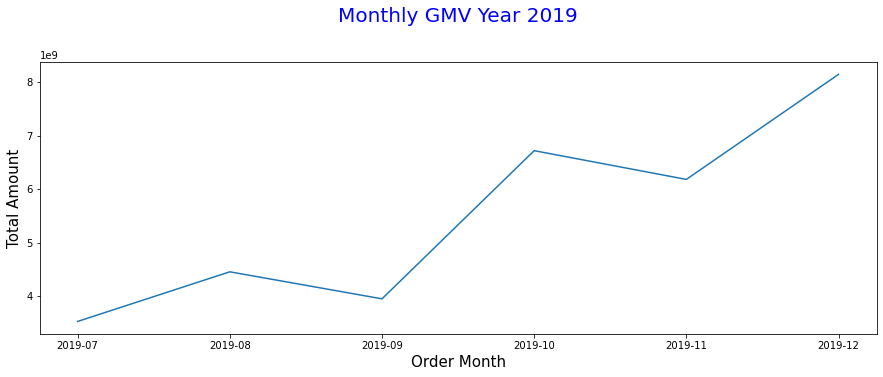

In [9]:
plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot()
# custom title and axis label
plt.title('Monthly GMV Year 2019', loc='center', pad=40, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount', fontsize=15)
plt.show()

<h4>Kustomisasi Line dan Point</h4>

<p>Untuk mengubah style dari garis maupun titik di chart, cukup dengan menambahkan parameter di function .plot(). Beberapa parameter yang bisa dikustomisasi:</p>

<li><b>color</b>: mengubah warnanya (sama seperti di title)</li>
<li><b>linewidth</b>: mengubah ketebalan line/garisnya (dalam satuan px)</li>
<li><b>linestyle</b>: mengubah jenis dari garis. Misalnya '-' atau 'solid' untuk garis tak terputus (seperti pada default), '--' atau 'dashed' untuk garis putus-putus, ':' atau 'dotted' untuk garis berupa titik-titik, bisa juga '-.' atau ‘dashdot’ untuk garis dan titik bergantian.</li>
<li><b>marker</b>: mengubah tipe points/titik data di chart. Ada banyak sekali kemungkinan nilai untuk marker ini, yang biasanya digunakan yaitu ‘.’ untuk bulatan kecil/titik, ‘o’ untuk bulatan agak besar, ‘s’ untuk persegi, ‘D’ untuk diamond/wajik, dan bentuk-bentuk lain seperti ‘+’, ‘x’, ‘|’, ‘*’.</li>

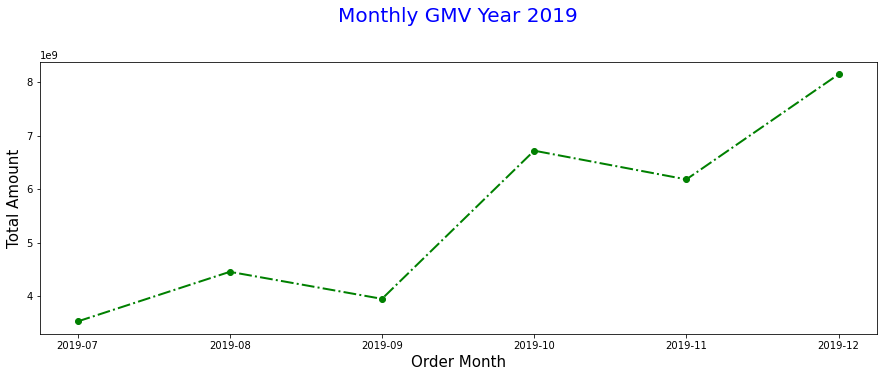

In [10]:
plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2) # custom line
plt.title('Monthly GMV Year 2019', loc='center', pad=40, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount', fontsize=15)
plt.show()

<h4>Kustomisasi Grid</h4>

kustomisasi grid juga yang berguna agar nilai di masing-masing titik bisa mudah dipetakan ke sumbu-y. Caranya dengan menambahkan <code>plt.grid()</code> dengan parameter yang mirip dengan line.

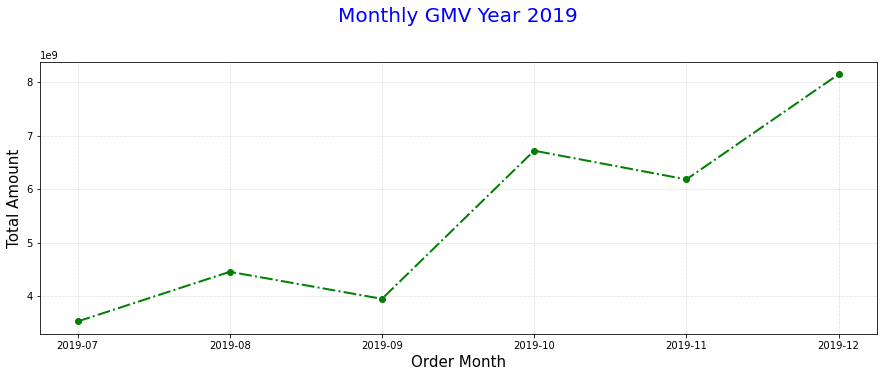

In [11]:
plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=40, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5) # custom grid
plt.show()

<h4>Kustomisasi Axis Ticks</h4>

Nilai-nilai di sumbu x dan y bisa diakses melalui function <code>plt.xticks()</code> dan <code>plt.yticks()</code>.

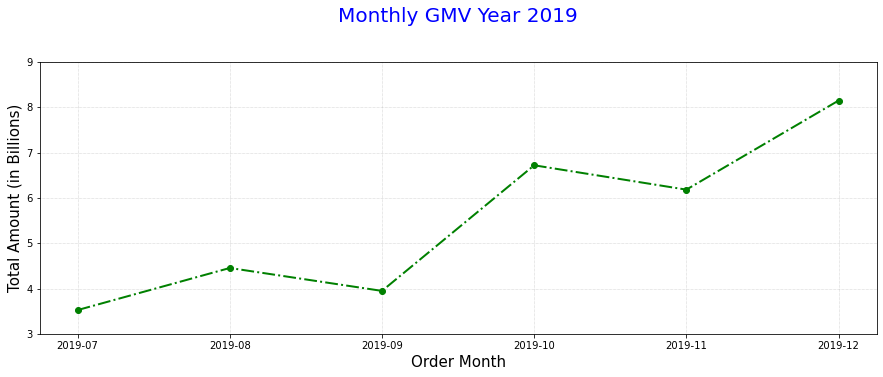

In [12]:
plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=40, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))  # custom axis ticks
plt.show()

Dapat dilihat bahwa <code>plt.ticks()</code> yang sebelumnya, digantikan dengan nilai baru yaitu nilai awal dibagi dengan 1 milyar (1000000000).

<h4>Batas Minimum dan Maksimum Axis Ticks</h4>

Di sini dapat dilihat bahwa nilai terkecil di sumbu-y adalah 150. Ini kadang bisa membuat orang tertipu sih, seakan-akan GMV di bulan Oktober naik menjadi hampir 3 kali lipat dari September. Untuk itu sebaiknya diset agar sumbu-y nya dimulai dari 0, cukup tambahkan <code>plt.ylim(ymin=0)</code>.

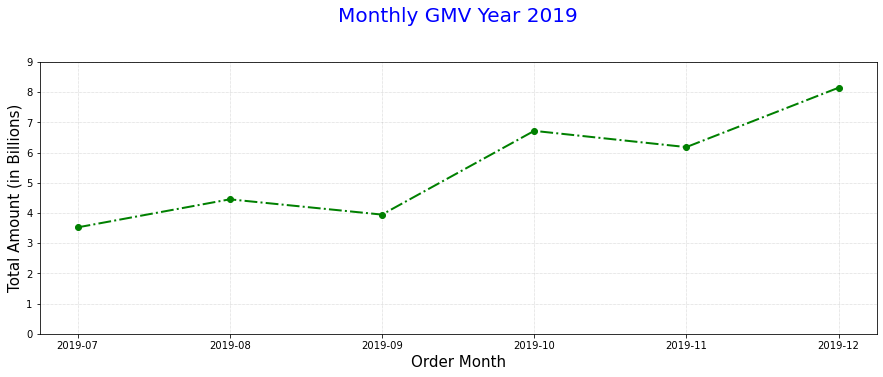

In [13]:
plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=40, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)  # menentukan batas minimum pada sumbu-y
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.show()

Untuk mengatur batas maksium, kita tambahkan juga parameter <code>ymax</code>, tetapi sepertinya di sini tidak perlu. Kita juga bisa mengatur batas minimum dan maksimum sumbu-x dengan function <code>plt.xlim</code>.

<h4>Menambahkan Informasi Pada Plot</h4>

<p>Ada baiknya kita menambahkan beberapa informasi di dalamnya agar pembaca mendapatkan <i>insight</i> dari grafik tersebut.</p>

<p>Dilihat dari trend-nya, mulai bulan Oktober 2019, GMV naik drastis setelah sebelumnya stagnan di angka 200-300 milyar per bulan. Kita bisa mulai dengan menambahkan info ini di grafik. Caranya dengan menambahkan <code>plt.text</code></p>

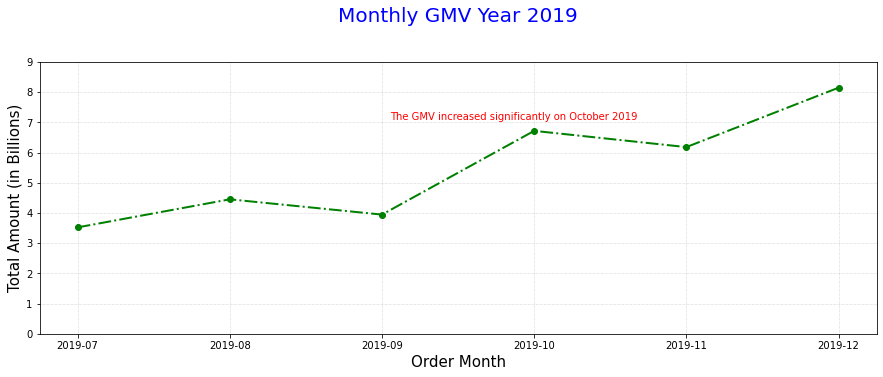

In [14]:
fig = plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=40, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.text(0.45, 0.72, 'The GMV increased significantly on October 2019', transform=fig.transFigure, color='red') # text informasi
plt.show()

<p>Perhatikan bahwa ada beberapa parameter yang diset saat menggunakan <code>plt.text</code>. Dua angka pertama itu adalah koordinat, x dan y. Saat set <code>transform=fig.transFigure</code>, maka koordinatnya berkisar 0 sampai 1 (untuk x dari kanan ke kiri, dan untuk y, dari bawah ke atas).</p>

<p>Jika parameter transform tidak diisi, maka koordinatnya dalam <b>satuan inch</b> (Dalam contoh ini, dari 0-15 dari kiri ke kanan, dan 0-5 dari bawah ke atas). Seperti halnya title atau label, dimungkinkan juga untuk set warna dan ukuran hurufnya.</p>

<h4>Menyimpan Hasil Plot Menjadi File Image</h4>

<p>Kita bisa menyimpan sebagai file gambar dengan function <code>savefig</code> sebelum <code>plt.show()</code></p>

<p>Kita bisa menyimpannya ke berbagai tipe file, seringnya sih jpg, png, atau kadang pdf juga bisa. Untuk mengetahui format lengkapnya, kita bisa menggunakan code berikut:</p>

In [15]:
plt.gcf().canvas.get_supported_filetypes()

{'ps': 'Postscript',
 'eps': 'Encapsulated Postscript',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

<Figure size 432x288 with 0 Axes>

<p>Ada berbagai parameter yang bisa diatur saat menyimpan gambar, antara lain:</p>

<li><b>dpi</b>: Resolusi gambar (dots per inch). </li>
<li><b>quality</b>: Kualitas gambar (hanya berlaku jika formatnya jpg atau jpeg), bisa diisi nilai 1 (paling buruk) hingga 95 (paling bagus).</li>
<li><b>facecolor</b>: Memberikan warna bagian depan figure, di luar area plot </li>
<li><b>edgecolor</b>: Memberikan warna pinggiran gambar</li>
<li><b>transparent</b>: Jika nilainya True, maka gambarnya jadi transparan (jika filenya png)</li>
 
<p>Tapi biasanya, parameter-parameter ini tidak digunakan karena grafik di file gambar bisa jadi berbeda dengan yang muncul saat menjalankan code di python.</p>

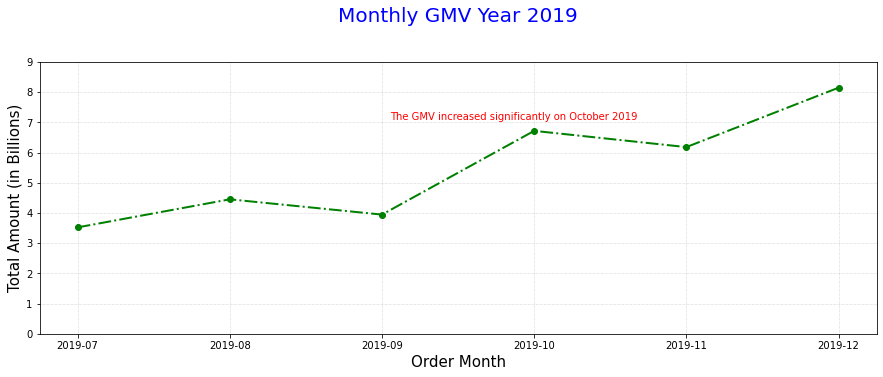

In [16]:
fig = plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title('Monthly GMV Year 2019', loc='center', pad=40, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.text(0.45,0.72, 'The GMV increased significantly on October 2019', transform=fig.transFigure, color='red')
plt.savefig('Resources/monthly_gmv.png', quality=95)  # menyimpan hasil plot dengan kualitas gambar yang tersimpan sebesar 95% dari awal
plt.show()

<h2><a name="mini-quiz"></a>Chapter 4: Mini Quiz</h2>

<div style="border: 2px solid orange;border-radius: 5px;">
    <b style="color:orange;padding:10px">Daily number of customers on Desember</b>
    <div style="padding:25px">
        <p>Dengan menggunakan dataset yang sama ('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv'), buatlah sebuah line chart dengan Matplotlib, yang menunjukkan jumlah pembeli harian (daily number of customers) selama bulan Desember.</p>
        <p>Beberapa spesifikasi yang harus diperhatikan:</p>
        <ul>
            <li>Ukuran figure adalah 10x5</li>
            <li>Sumbu-x adalah tanggal pembelian, dari tanggal 1 - 31 Desember 2019</li>
            <li>Sumbu-y adalah jumlah unique customers di tiap tanggal</li>
            <li>Title dan axis label harus ada, tulisan dan style-nya silakan disesuaikan sendiri</li>
        </ul>
    </div>
</div>

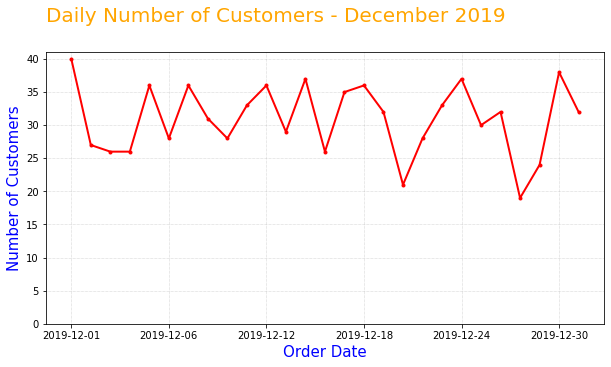

In [17]:
# Import library yang dibutuhkan
import datetime
import pandas as pd
import matplotlib.pyplot as plt

# Baca dataset retail_raw_reduced.csv
dataset = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv')

# Buat kolom order_month
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))

# Buat kolom gmv
dataset['gmv'] = dataset['item_price'] * dataset['quantity']

# Plot grafik sesuai dengan instruksi
plt.figure(figsize=(10, 5))
dataset[dataset['order_month']=='2019-12'].groupby(['order_date'])['customer_id'].nunique().plot(color='red', marker='.', linewidth=2)
plt.title('Daily Number of Customers - December 2019', loc='left', pad=30, fontsize=20, color='orange')
plt.xlabel('Order Date', fontsize=15, color='blue')
plt.ylabel('Number of Customers', fontsize=15, color='blue')
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
plt.show()